In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sksurv.nonparametric import kaplan_meier_estimator

## checking out the data first
pheno = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_DS_2022.09.27_GRU-IRB-PUB.csv')
pheno_dd = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Biomarker_DD_2022.09.27.csv')
cognition_DD = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_DD_2022.09.27.csv')

In [2]:
pheno

,Study,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,PHC_Ethnicity,PHC_Education,PHC_MEM,PHC_EXF,PHC_LAN,PHC_VSP
0,NACC,A-ADC-AD000003,1,69.74401095,1.0,2,3,2.0,6.0,-0.408,-1.272,-1.172,NaN
1,NACC,A-ADC-AD000003,2,70.67761807,3.0,2,3,2.0,6.0,-0.492,-1.254,-1.121,NaN
2,NACC,A-ADC-AD000003,3,71.67693361,3.0,2,3,2.0,6.0,-0.528,NaN,-1.121,NaN
3,NACC,A-ADC-AD000007,1,69.99863107,1.0,1,3,2.0,14.0,0.453,-0.241,0.012,NaN
4,NACC,A-ADC-AD000007,2,71.06365503,1.0,1,3,2.0,14.0,0.241,-0.223,0.429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25819,ADNI,G-ADNI-AN000321,2,71.1321013,1.0,1,5,2.0,18.0,0.877,0.806,1.335,NaN
25820,ADNI,G-ADNI-AN000321,3,73.2183436,2.0,1,5,2.0,18.0,0.792,1.217,1.223,NaN
25821,ADNI,G-ADNI-AN000321,4,74.21218344,2.0,1,5,2.0,18.0,0.714,1.205,1.281,NaN
25822,ADNI,G-ADNI-AN000309,1,75.61396304,1.0,2,5,2.0,15.0,0.006,0.639,0.364,NaN


In [150]:
## Data exploration
print(len(pheno.SUBJID.unique()))
print(len(new_pheno[new_pheno.duplicated(subset=['SUBJID'], keep = False)].SUBJID.unique()))


5300
4259


4568

In [3]:
cognition_DD

,VARNAME,VARDESC,COMMENT,VALUES,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Study,Cohort Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUBJID,ADSP Subject ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHC_Visit,Harmonized Visit Number,Given differences in visit codes across cohort...,NaN,NaN,NaN,NaN,NaN,NaN
3,PHC_Age,Age at Each Visit. Note this is a character v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHC_Diagnosis,Status of Alzheimer's Diagnosis,NaN,1 = No Cognitive Impairment,2 = Mild Cognitive Impairment,3 = Alzheimer's Dementia,NA = Not available or Other Dementia (not AD),NaN,NaN
5,PHC_Sex,Sex,NaN,1 = Male,2 = Female,NaN,NaN,NaN,NaN
6,PHC_Race,NIH Racial Categories,NaN,1 = American Indian or Alaska Native,2 = Asian,3 = Black or African American,4 = Native Hawaiian or Other Pacific Islander,5 = White,"6 = Other, Unknown, or More than one race"
7,PHC_Ethnicity,Hispanic or Latino or Not Hispanic or Latino,NaN,1 = Hispanic or Latino,2 = Not Hispanic or Latino,NA = Not available,NaN,NaN,NaN
8,PHC_Education,Years of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PHC_MEM,Harmonized Composite Memory Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pheno_dd

,VARNAME,VARDESC,COMMENT,VALUES,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Study,Cohort Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUBJID,ADSP Subject ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHC_Visit,Harmonized Visit Number,"See ""ADSP-PHC-Cognition_DD_2022.09.27.csv"" for...",NaN,NaN,NaN,NaN,NaN,NaN
3,PHC_Age,Age at Each Visit. Note this is a character va...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHC_Diagnosis,Status of Alzheimer's Diagnosis,NaN,1 = No Cognitive Impairment,2 = Mild Cognitive Impairment,3 = Alzheimer's Dementia,NA = Not available or Other Dementia (not AD),NaN,NaN
5,PHC_Sex,Sex,NaN,1 = Male,2 = Female,NaN,NaN,NaN,NaN
6,PHC_Race,NIH Racial Categories,NaN,1 = American Indian or Alaska Native,2 = Asian,3 = Black or African American,4 = Native Hawaiian or Other Pacific Islander,5 = White,"6 = Other, Unknown, or More than one race"
7,PHC_Ethnicity,Hispanic or Latino or Not Hispanic or Latino,NaN,1 = Hispanic or Latino,2 = Not Hispanic or Latino,NA = Not available,NaN,NaN,NaN
8,PHC_Education,Years of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PHC_AB42,Harmonized Z-Score for AB42 Biomarker Levels,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'PHC_Visit'}>]], dtype=object)

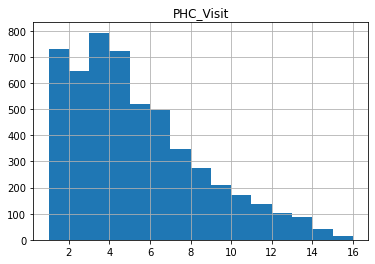

In [3]:
pd.DataFrame(pheno.groupby('SUBJID')['PHC_Visit'].max()).hist(bins=15)

## check if there are patients that changed their diagnosis with different visit. 

* but first need binarize the non-binary diagnosis (PHC = 1,2 :control; PHC=3 : case)
* Note: There are no diagnosis that is 4 (NA) in PHC scale, so we can assign all non-phc-3 sample as controls. 


In [4]:
## remove rows without diagnosis
null_index = pheno[pheno.PHC_Diagnosis.isnull()].index
new_pheno = pheno.drop(null_index).loc[:,['SUBJID', 'PHC_Visit', 'PHC_Age', 'PHC_Diagnosis', 'PHC_Sex', 'PHC_Race']]

print('PHC Diagnosis 1-4')
print(new_pheno.PHC_Diagnosis.value_counts())
new_pheno['Diagnosis'] = new_pheno['PHC_Diagnosis'].apply(lambda x: 1 if x == 3 else 0) 


## check #case and #control
print('\nDiagnosis 0/1')
print(new_pheno.Diagnosis.value_counts())

PHC Diagnosis 1-4
1.0    11743
2.0     6235
3.0     5855
Name: PHC_Diagnosis, dtype: int64

Diagnosis 0/1
0    17978
1     5855
Name: Diagnosis, dtype: int64


In [99]:
## how many nulls
len(pheno[pheno.PHC_Diagnosis.isnull()].SUBJID.unique())

1037

In [102]:
len(pheno.SUBJID.unique())

5300

In [5]:
# extract the samples whose diagnosis changed 
change_status= pd.DataFrame(new_pheno.groupby('SUBJID')['Diagnosis'].mean())
ID_change_status = pd.Series(change_status[(change_status.Diagnosis > 0 )& (change_status.Diagnosis <1)].index)
change_status[(change_status.Diagnosis > 0 )& (change_status.Diagnosis <1)]

,Diagnosis
SUBJID,
A-ADC-AD000003,0.666667
A-ADC-AD000769,0.250000
A-ADC-AD000786,0.111111
A-ADC-AD000805,0.200000
A-ADC-AD000817,0.375000
...,...
G-ADNI-AN000755,0.833333
G-ADNI-AN000758,0.500000
G-ADNI-AN000761,0.500000


In [6]:
## extract the SUBJID and which visit does the diagnosis change.

## Extract samples with multiple visit
multi_visit = new_pheno[new_pheno.duplicated(subset=['SUBJID'], keep = False)]
multi_visit = multi_visit[~multi_visit.duplicated(subset=['SUBJID', 'Diagnosis'])] ## remove rows with the same diagnosis

changed_diag = multi_visit[multi_visit.duplicated(subset=['SUBJID'], keep = False)]


In [81]:
multi_visit[0:32]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
0,A-ADC-AD000003,1,69.74401095,1.0,2,3,0
1,A-ADC-AD000003,2,70.67761807,3.0,2,3,1
3,A-ADC-AD000007,1,69.99863107,1.0,1,3,0
8,A-ADC-AD000274,1,63.69336071,1.0,2,5,0
17,A-ADC-AD000674,1,85.42368241,3.0,2,5,1
19,A-ADC-AD000744,1,67.86310746,1.0,2,5,0
30,A-ADC-AD000747,1,67.87405886,1.0,1,5,0
42,A-ADC-AD000756,1,83.90143737,1.0,1,5,0
49,A-ADC-AD000757,1,64,1.0,1,5,0
63,A-ADC-AD000760,1,69.10609172,1.0,2,5,0


In [82]:
multi_visit[multi_visit.SUBJID =='A-ADC-AD000792']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
200,A-ADC-AD000792,1,65.31416838,1.0,1,5,0
201,A-ADC-AD000792,2,66.16016427,1.0,1,5,0
202,A-ADC-AD000792,3,67.18138261,1.0,1,5,0
203,A-ADC-AD000792,4,68.22724162,1.0,1,5,0
204,A-ADC-AD000792,5,69.13073238,1.0,1,5,0
205,A-ADC-AD000792,6,70.14373717,1.0,1,5,0
206,A-ADC-AD000792,7,71.06639288,1.0,1,5,0
207,A-ADC-AD000792,8,72.02737851,1.0,1,5,0
208,A-ADC-AD000792,9,73.0568104,1.0,1,5,0
209,A-ADC-AD000792,10,74.30800821,1.0,1,5,0


In [151]:
multi_visit = new_pheno[new_pheno.duplicated(subset=['SUBJID'], keep = False)]

In [152]:
multi_visit.groupby('SUBJID')['PHC_Diagnosis'].max().value_counts()

3.0    1730
1.0    1480
2.0    1049
Name: PHC_Diagnosis, dtype: int64

array([[<AxesSubplot:title={'center':'PHC_Visit'}>]], dtype=object)

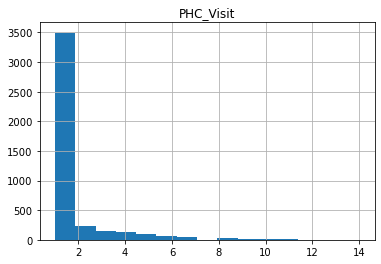

In [8]:
pd.DataFrame(multi_visit.groupby('SUBJID')['PHC_Visit'].max()).hist(bins=15)

In [118]:
multi_visit.isnull().values.any()

False

In [128]:
len(multi_visit.SUBJID.unique())


4259

In [9]:
multi_visit[(multi_visit.PHC_Diagnosis != 1) & (multi_visit.PHC_Diagnosis != 2) & (multi_visit.PHC_Diagnosis != 3)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis


In [53]:
multi_visit[multi_visit.PHC_Visit.isnull()]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis


In [132]:
changed_diag 

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
0,A-ADC-AD000003,1,69.74401095,1.0,2,3,0
1,A-ADC-AD000003,2,70.67761807,3.0,2,3,1
103,A-ADC-AD000769,1,75.94250513,1.0,2,5,0
106,A-ADC-AD000769,4,79.37029432,3.0,2,5,1
155,A-ADC-AD000786,1,76.26009582,1.0,1,5,0
...,...,...,...,...,...,...,...
25309,G-ADNI-AN000293,4,82.65571526,3.0,2,5,1
25450,G-ADNI-AN000358,1,76.99657769,1.0,1,5,0
25453,G-ADNI-AN000358,4,78.99520876,3.0,1,5,1
25790,G-ADNI-AN000316,1,71.75633128,1.0,1,6,0


In [133]:
new_pheno[new_pheno['SUBJID']=='A-ADC-AD000769']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
103,A-ADC-AD000769,1,75.94250513,1.0,2,5,0
104,A-ADC-AD000769,2,77.0349076,1.0,2,5,0
105,A-ADC-AD000769,3,78.01232033,2.0,2,5,0
106,A-ADC-AD000769,4,79.37029432,3.0,2,5,1


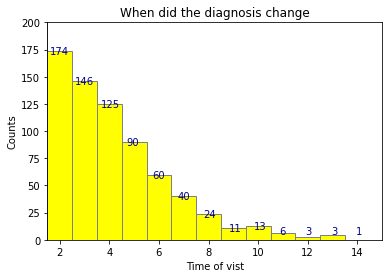

In [147]:
bin_size = changed_diag.PHC_Visit.max() - changed_diag.PHC_Visit.min()
plt.hist(changed_diag.PHC_Visit, histtype='bar', color='yellow', edgecolor='grey', bins=bin_size, align = 'left')
plt.xlabel('Time of vist')
plt.ylabel('Counts')
plt.xlim(1.5,max(changed_diag.PHC_Visit)+1)
plt.ylim(0,math.ceil(changed_diag.PHC_Visit.value_counts()[2]/50)*50)
plt.title('When did the diagnosis change')
right_space = 0
for index, value in enumerate(changed_diag.PHC_Visit.value_counts(sort=False)[1:]):
    plt.text(index+ 1.6 + right_space, max(value-3,5), str(value), color='darkblue')
    right_space += 0.03

plt.show()

In [146]:
print(changed_diag.PHC_Visit.value_counts(sort=False)[1:])

2     174
3     146
4     125
5      90
6      60
7      40
8      24
9      11
10     13
11      6
12      3
13      3
14      1
Name: PHC_Visit, dtype: int64


In [14]:
changed_diag

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
0,A-ADC-AD000003,1,69.74401095,1.0,2,3,0
1,A-ADC-AD000003,2,70.67761807,3.0,2,3,1
103,A-ADC-AD000769,1,75.94250513,1.0,2,5,0
106,A-ADC-AD000769,4,79.37029432,3.0,2,5,1
155,A-ADC-AD000786,1,76.26009582,1.0,1,5,0
...,...,...,...,...,...,...,...
25309,G-ADNI-AN000293,4,82.65571526,3.0,2,5,1
25450,G-ADNI-AN000358,1,76.99657769,1.0,1,5,0
25453,G-ADNI-AN000358,4,78.99520876,3.0,1,5,1
25790,G-ADNI-AN000316,1,71.75633128,1.0,1,6,0


In [40]:
#changed_diag[changed_diag.PHC_Age == '90+']
changed_diag.loc[changed_diag['PHC_Age'] == '90+', 'PHC_Age'] = 90
changed_diag.PHC_Age = changed_diag.PHC_Age.astype('float')

In [63]:
changed_diag.groupby('SUBJID')['PHC_Age'].diff().dropna()

1        0.933607
106      3.427789
163      8.002738
240      0.000000
260      3.275838
           ...   
25212    4.799452
25299    1.015743
25309    2.050650
25453    1.998631
25793    5.519507
Name: PHC_Age, Length: 688, dtype: float64

In [57]:
case = changed_diag.loc[:,['SUBJID', 'PHC_Sex', 'PHC_Race']].drop_duplicates()

In [72]:
case['time'] = changed_diag.groupby('SUBJID')['PHC_Age'].diff().dropna().values

In [73]:
case

,SUBJID,PHC_Sex,PHC_Race,time
0,A-ADC-AD000003,2,3,0.933607
103,A-ADC-AD000769,2,5,3.427789
155,A-ADC-AD000786,1,5,8.002738
236,A-ADC-AD000805,1,5,0.000000
255,A-ADC-AD000817,1,5,3.275838
...,...,...,...,...
25207,G-ADNI-AN000177,1,5,4.799452
25297,G-ADNI-AN000196,2,5,1.015743
25306,G-ADNI-AN000293,2,5,2.050650
25450,G-ADNI-AN000358,1,5,1.998631


In [74]:
changed_diag[changed_diag.SUBJID =='A-ADC-AD000805']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
236,A-ADC-AD000805,1,90.0,1.0,1,5,0
240,A-ADC-AD000805,5,90.0,3.0,1,5,1


In [98]:
case.time.describe()

count    688.000000
mean       2.814314
std        2.187258
min        0.000000
25%        1.054073
50%        2.050650
75%        3.989049
max       13.051335
Name: PHC_Age, dtype: float64

In [142]:
print(case.time)

1         0.000000
106       0.000000
163       0.000000
240       0.000000
260       0.000000
           ...    
25212    10.765229
25299    11.151266
25309    11.496235
25453    12.383299
25793    13.051335
Name: PHC_Age, Length: 688, dtype: float64


,SUBJID,PHC_Sex,PHC_Race,time
0,A-ADC-AD000003,2,3,0.933607
103,A-ADC-AD000769,2,5,3.427789
155,A-ADC-AD000786,1,5,8.002738
236,A-ADC-AD000805,1,5,0.000000
255,A-ADC-AD000817,1,5,3.275838
...,...,...,...,...
25207,G-ADNI-AN000177,1,5,4.799452
25297,G-ADNI-AN000196,2,5,1.015743
25306,G-ADNI-AN000293,2,5,2.050650
25450,G-ADNI-AN000358,1,5,1.998631


In [107]:
import seaborn as sns


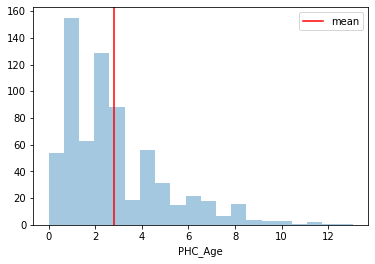

In [113]:
ax = sns.distplot(case.time, kde = False)
plt.axvline(x=case.time.mean(), color='red', label= 'mean')
plt.legend(loc='upper right')


[Text(0.5, 0, 'Time(year)'), Text(0.5, 1.0, 'When did the diagnosis change')]

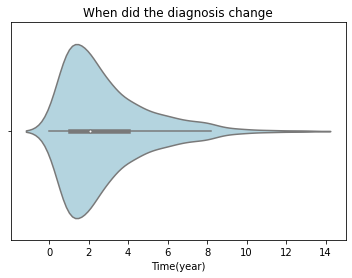

In [120]:
ax = sns.violinplot(x= case.time, color='lightblue')
ax.set(xlabel='Time(year)', title='When did the diagnosis change')

,SUBJID,PHC_Sex,PHC_Race,time
0,A-ADC-AD000003,2,3,0.933607
103,A-ADC-AD000769,2,5,3.427789
155,A-ADC-AD000786,1,5,8.002738
236,A-ADC-AD000805,1,5,0.000000
255,A-ADC-AD000817,1,5,3.275838
...,...,...,...,...
25207,G-ADNI-AN000177,1,5,4.799452
25297,G-ADNI-AN000196,2,5,1.015743
25306,G-ADNI-AN000293,2,5,2.050650
25450,G-ADNI-AN000358,1,5,1.998631


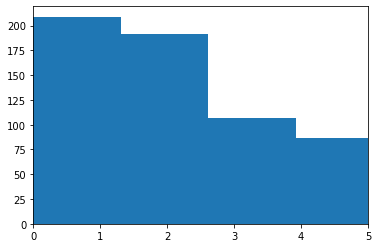

In [106]:
plt.hist(case.time, histtype='bar',bins=10)
plt.xlim(0,5)
plt.show()

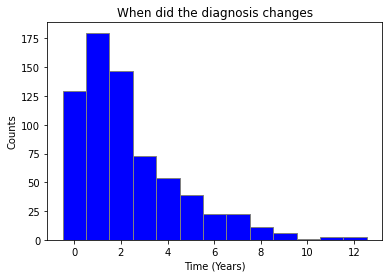

In [97]:
plt.hist(case.time, histtype='bar',color='blue', edgecolor='grey', bins=bin_size, align = 'left')
plt.xlabel('Time (Years)')
plt.ylabel('Counts')
plt.title('When did the diagnosis changes')
plt.show()

In [67]:
bin_size = changed_diag.PHC_Visit.max() - changed_diag.PHC_Visit.min()
plt.hist(changed_diag.PHC_Visit, histtype='bar', color='yellow', edgecolor='grey', bins=bin_size, align = 'left')
plt.xlabel('Time of vist')
plt.ylabel('Counts')
plt.xlim(1.5,max(changed_diag.PHC_Visit)+0.5)
plt.ylim(0,math.ceil(changed_diag.PHC_Visit.value_counts()[2]/50)*50)
plt.title('When did the diagnosis change', fontweight = 'bold')
right_space = 0
for index, value in enumerate(changed_diag.PHC_Visit.value_counts()[1:]):
    
    plt.text(index+ 1.6 + right_space, max(value-3,5), str(value), color='darkblue')
    right_space += 0.03

plt.show()

,SUBJID,PHC_Sex,PHC_Race,time
0,A-ADC-AD000003,2,3,NaN
103,A-ADC-AD000769,2,5,NaN
155,A-ADC-AD000786,1,5,NaN
236,A-ADC-AD000805,1,5,NaN
255,A-ADC-AD000817,1,5,NaN
...,...,...,...,...
25207,G-ADNI-AN000177,1,5,NaN
25297,G-ADNI-AN000196,2,5,NaN
25306,G-ADNI-AN000293,2,5,NaN
25450,G-ADNI-AN000358,1,5,NaN


In [38]:
changed_diag[changed_diag.PHC_Age == '90+'].count()

SUBJID           0
PHC_Visit        0
PHC_Age          0
PHC_Diagnosis    0
PHC_Sex          0
PHC_Race         0
Diagnosis        0
dtype: int64

In [11]:
multi_visit[(~multi_visit.SUBJID.isin(changed_diag.SUBJID)) & (multi_visit.Diagnosis == 1)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
17,A-ADC-AD000674,1,85.42368241,3.0,2,5,1
1876,A-ADC-AD002972,1,80.57768652,3.0,1,5,1
1881,A-ADC-AD002974,1,83.94524298,3.0,2,5,1
1884,A-ADC-AD002982,1,70.20944559,3.0,2,5,1
1886,A-ADC-AD002985,1,86.25051335,3.0,1,5,1
...,...,...,...,...,...,...,...
25647,G-ADNI-AN000250,1,85.88364134,3.0,1,5,1
25678,G-ADNI-AN000325,1,74.41204654,3.0,2,5,1
25713,G-ADNI-AN000295,1,66.43942505,3.0,2,5,1
25715,G-ADNI-AN000339,1,56.7008898,3.0,1,5,1


,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
3,A-ADC-AD000007,1,69.99863107,1.0,1,3,0
8,A-ADC-AD000274,1,63.69336071,1.0,2,5,0
19,A-ADC-AD000744,1,67.86310746,1.0,2,5,0
30,A-ADC-AD000747,1,67.87405886,1.0,1,5,0
42,A-ADC-AD000756,1,83.90143737,1.0,1,5,0
...,...,...,...,...,...,...,...
25801,G-ADNI-AN000304,1,60.02737851,1.0,2,5,0
25807,G-ADNI-AN000343,1,67.14852841,1.0,2,5,0
25813,G-ADNI-AN000355,1,74.53524983,1.0,2,5,0
25818,G-ADNI-AN000321,1,68.65160849,1.0,1,5,0


In [12]:
## needs to add controls
multi_visit[~multi_visit.SUBJID.isin(changed_diag.SUBJID)][1:20]  
multi_visit[(~multi_visit.SUBJID.isin(changed_diag.SUBJID)) & (multi_visit.Diagnosis == 0)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
8,A-ADC-AD000274,1,63.69336071,1.0,2,5,0
17,A-ADC-AD000674,1,85.42368241,3.0,2,5,1
19,A-ADC-AD000744,1,67.86310746,1.0,2,5,0
30,A-ADC-AD000747,1,67.87405886,1.0,1,5,0
42,A-ADC-AD000756,1,83.90143737,1.0,1,5,0
49,A-ADC-AD000757,1,64,1.0,1,5,0
63,A-ADC-AD000760,1,69.10609172,1.0,2,5,0
74,A-ADC-AD000763,1,82.59000684,1.0,1,5,0
84,A-ADC-AD000767,1,66.7871321,1.0,2,5,0
94,A-ADC-AD000768,1,70.63107461,1.0,2,5,0


In [138]:
multi_visit[~multi_visit.SUBJID.isin(changed_diag.SUBJID)]

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
3,A-ADC-AD000007,1,69.99863107,1.0,1,3,0
8,A-ADC-AD000274,1,63.69336071,1.0,2,5,0
17,A-ADC-AD000674,1,85.42368241,3.0,2,5,1
19,A-ADC-AD000744,1,67.86310746,1.0,2,5,0
30,A-ADC-AD000747,1,67.87405886,1.0,1,5,0
...,...,...,...,...,...,...,...
25801,G-ADNI-AN000304,1,60.02737851,1.0,2,5,0
25807,G-ADNI-AN000343,1,67.14852841,1.0,2,5,0
25813,G-ADNI-AN000355,1,74.53524983,1.0,2,5,0
25818,G-ADNI-AN000321,1,68.65160849,1.0,1,5,0


In [14]:
new_pheno[new_pheno.SUBJID == 'A-ADC-AD000674']

,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,Diagnosis
17,A-ADC-AD000674,1,85.42368241,3.0,2,5,1
18,A-ADC-AD000674,2,86.45585216,3.0,2,5,1
